In [67]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import ndimage
from sklearn.cluster import KMeans

(600, 600)


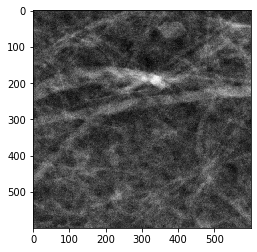

In [68]:
image = r"C:\Users\cory1\OneDrive\Documents\test-folder\B\image_10-14-2019_29.jpg"
Beginning_image = cv2.imread(image,0)

q = Beginning_image.shape[0]
u = Beginning_image.shape[1]
beginning_image = Beginning_image
x1ml = 500 - 200
x2ml = 700 + 200
z1ml = 1100 - 200
z2ml = 1300 + 200
diffxml = x2ml - x1ml
diffzml = z2ml - z1ml

LMLOml = np.zeros((diffzml, diffxml))
for j in range(z1ml, z2ml):
    for k in range(x1ml, x2ml):
        LMLOml[j-z1ml,k-x1ml] = beginning_image[j,k]
        
plt.imshow(LMLOml, cmap = 'gray')
print(LMLOml.shape)
#cv2.imwrite('/home/cot12/Documents/test-folder/abnormaility-cuts/client-1034-LMLO-imagecrop.jpg',LMLOml)
#this just cuts out the abnomaility

C:\Users\cory1\Anaconda3\envs\Cory\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


[]

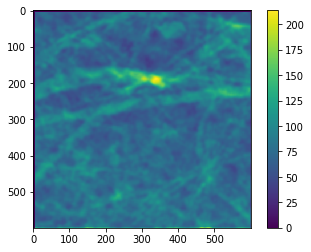

In [69]:
LMLO_density = np.zeros((diffzml,diffxml))
u = 5
for i in range(0, diffzml):
    for j in range(0, diffxml):
        
        lum = np.sum(LMLOml[i-u:i+u,j-u:j+u])/(len(LMLOml[i-u:i+u,j-u:j+u])**2)
        if 0 <= lum <= 255:
            LMLO_density[i,j] = lum
        else:
            LMLO_density[i,j] = 0
plt.imshow(LMLO_density, cmap = 'gray')
plt.imshow(LMLO_density[:,:])
plt.colorbar()
plt.plot()

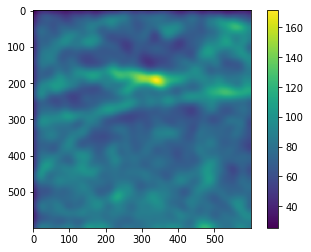

In [130]:
Blur_array = np.zeros((diffzml, diffxml))
transfer = np.zeros((diffzml, diffxml))
Blur_array[:,:] = ndimage.filters.gaussian_filter(LMLO_density,10)
for ii in range(0, diffzml):
    for kk in range(0, diffxml):
        transfer[ii,kk] = Blur_array[ii,kk]
plt.imshow(transfer)
plt.colorbar()

In [131]:
slit = np.zeros((100,diffxml))
for ii in range(0, 100):
    for kk in range(0,diffxml):
        slit[ii,kk]=transfer[ii+150, kk]

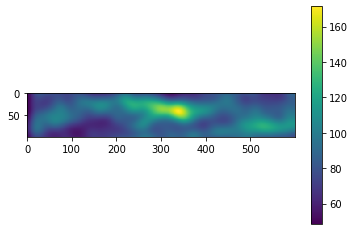

In [132]:
plt.imshow(slit)
plt.colorbar()

In [133]:
lum = []
lum_below = []
for kk in range(0, diffxml):
    lum.append(slit[50,kk]) 
    lum_below.append(slit[49,kk])
zaxis = list(range(0,diffxml))
dx = (transfer[25, 0] - transfer[25, 0]) * 0.5 / 255
dx2 = np.absolute(dx)
print(dx2)
lumy = []
y_position =[]
for kk in range(0,diffzml):
    lumy.append(transfer[kk,30])
yaxis = list(range(0,diffzml))

0.0


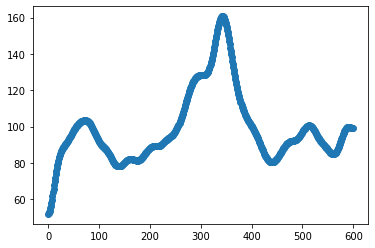

In [134]:
plt.scatter(zaxis, lum)

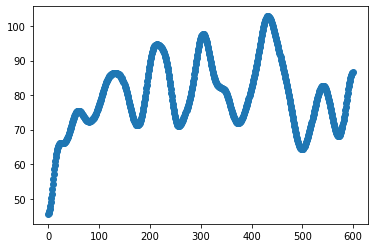

In [135]:
plt.scatter(yaxis, lumy)

In [136]:
lum_array = np.array(lumy, dtype = 'float')
y_position = np.array(yaxis)
def max_gradient_check(old_array,diffzml):
    maxi = []
    maxy = []
    for ii in range(1,diffzml-1):
        val_before = old_array[ii-1]
        val_after = old_array[ii+1]
        val_now = old_array[ii]
        if val_before <= val_now and val_after <= val_now:
            if val_now >= 1:
                maxi.append(val_now)
                maxy.append(ii)
    return maxy, maxi

def min_gradient_check(old_array,diffzml):
    mini = []
    miny = []
    for ii in range(1,diffzml-1):
        val_before = old_array[ii-1]
        val_after = old_array[ii+1]
        val_now = old_array[ii]
        if val_before >= val_now and val_after >= val_now:
            if val_now >= 1:
                mini.append(val_now)
                miny.append(ii)
    return miny, mini

In [137]:
a = min_gradient_check(lum_array,diffzml)
b = max_gradient_check(lum_array, diffzml)

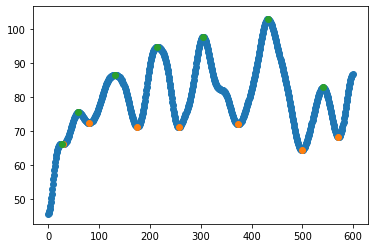

In [138]:
plt.scatter(y_position, lum_array)
plt.scatter(a[0],a[1])
plt.scatter(b[0],b[1])

In [139]:
lum_diff= np.array(lum, dtype = 'float')

600


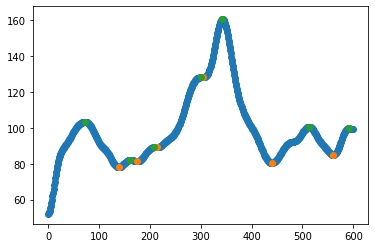

In [145]:
min_diff = min_gradient_check(lum_diff,diffxml)
max_diff = max_gradient_check(lum_diff, diffxml)
plt.scatter(zaxis, lum)
plt.scatter(min_diff[0],min_diff[1])
plt.scatter(max_diff[0],max_diff[1])
print(len(yaxis))

In [141]:
print(max_diff[1])

[103.45538929746735, 82.20724748026373, 89.154250551186, 128.2627653536402, 160.68801121476582, 100.67339731071289, 99.74791818154563]


In [142]:
def min_gradient_x_check(old_array,diffzml, kk):
    mini = []
    miny = []
    for ii in range(1,diffzml-1):
        val_before = old_array[ii-1, kk]
        val_after = old_array[ii+1,kk]
        val_now = old_array[ii,kk]
        if val_before >= val_now and val_after >= val_now:
            if val_now >= 1:
                mini.append(val_now)
                miny.append(ii)
    return miny, mini

def max_gradient_x_check(old_array,diffzml, kk):
    mini = []
    miny = []
    for ii in range(1,diffzml-1):
        val_before = old_array[ii-1, kk]
        val_after = old_array[ii+1,kk]
        val_now = old_array[ii,kk]
        if val_before <= val_now and val_after <= val_now:
            if val_now >= 1:
                mini.append(val_now)
                miny.append(ii)
    return miny, mini

def max_gradient_z_check(old_array,diffxml, ii):
    mini = []
    miny = []
    for kk in range(1,diffxml-1):
        val_before = old_array[ii,kk-1]
        val_after = old_array[ii,kk+1]
        val_now = old_array[ii,kk]
        if val_before <= val_now and val_after <= val_now:
            if val_now >= 1:
                mini.append(val_now)
                miny.append(kk)
    return miny, mini

def min_gradient_z_check(old_array,diffxml, ii):
    mini = []
    miny = []
    for kk in range(1,diffxml-1):
        val_before = old_array[ii,kk-1]
        val_after = old_array[ii,kk+1]
        val_now = old_array[ii,kk]
        if val_before >= val_now and val_after >= val_now:
            if val_now >= 1:
                mini.append(val_now)
                miny.append(kk)
    return miny, mini

def mini_x_map(old_array, diffzml,diffxml):
    clusterD = np.zeros((diffzml, diffxml))
    for ii in range(0,diffzml):
        mins_z = min_gradient_z_check(old_array,diffxml, ii)
        for jj in range(0, len(mins_z[0])):
            clusterD[ii,mins_z[0][jj]] = 1
    for kk in range(0, diffxml):
        mins_x = min_gradient_x_check(old_array,diffzml, kk)
        for jj in range(0, len(mins_x[0])):
            clusterD[mins_x[0][jj],kk] = 1
    for ii in range(0,diffzml):
        max_z = max_gradient_z_check(old_array,diffxml, ii)
        for jj in range(0, len(max_z[0])):
            clusterD[ii,max_z[0][jj]] = 2
    for kk in range(0, diffxml):
        max_x = max_gradient_x_check(old_array,diffzml, kk)
        for jj in range(0, len(max_x[0])):
            clusterD[max_x[0][jj],kk] = 2
    return clusterD

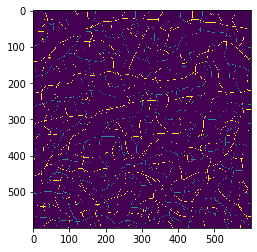

In [143]:
a = mini_x_map(transfer, diffzml,diffxml)

plt.imshow(a)

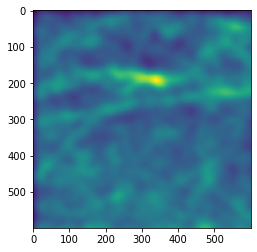

In [144]:
plt.imshow(transfer)